### Tech Challenge

#### importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### import data

In [2]:
data = pd.read_csv('data/measurements.csv')
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


#### checking datatypes

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [4]:
print(data.dtypes)

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object


### cleaning data

#### checking for NaN values

In [5]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

#### checking column values

In [6]:
data.value_counts('distance')

distance
11,8    37
16      24
12,3    23
12,4    18
15,4    14
        ..
19,8     1
19,6     1
18,9     1
18,8     1
93,9     1
Length: 174, dtype: int64

In [7]:
#data['distance'] = data['distance'].astype(float)
#data['distance'] = pd.to_numeric(data['distance'], errors='ignore')

In [8]:
#print(data.dtypes)

In [9]:
data['distance'] = data['distance'].apply(lambda x: x.replace(',', '.'))

In [10]:
data['distance'] = data['distance'].astype(float)

In [11]:
data['distance']

0      28.0
1      12.0
2      11.2
3      12.9
4      18.5
       ... 
383    16.0
384    16.1
385    16.0
386    15.4
387    14.7
Name: distance, Length: 388, dtype: float64

In [12]:
data.value_counts('consume')

consume
5       27
4,5     27
4,6     22
4,7     21
4,1     20
4,3     20
5,1     19
4,8     19
4,4     17
4       17
4,9     16
4,2     15
5,3     14
3,9     14
5,2     12
5,7     11
3,8     11
5,6     10
5,4      9
3,7      8
5,8      7
5,5      6
5,9      5
6,2      4
6,4      4
3,6      4
6,3      4
6        4
6,1      4
6,5      2
7,4      2
8,1      2
9        1
8,7      1
7,9      1
7,1      1
10,8     1
6,9      1
6,6      1
11,5     1
3,3      1
12,2     1
9,9      1
dtype: int64

In [13]:
data['consume'] = data['consume'].apply(lambda x: x.replace(',', '.'))

In [14]:
data['consume'] = data['consume'].astype(float)


In [15]:
data['consume']

0      5.0
1      4.2
2      5.5
3      3.9
4      4.5
      ... 
383    3.7
384    4.3
385    3.8
386    4.6
387    5.0
Name: consume, Length: 388, dtype: float64

In [16]:
data.value_counts('speed')

speed
42    18
43    17
38    16
26    15
40    15
36    15
33    15
44    12
37    12
32    12
55    11
29    11
46    11
39    11
45    10
58    10
25    10
24     9
50     9
35     9
57     8
41     8
52     7
28     6
21     6
48     6
61     6
51     6
53     6
30     6
56     5
47     5
22     5
49     4
62     4
34     4
27     4
23     3
59     3
60     3
54     3
31     3
80     3
75     3
20     2
16     2
18     2
63     2
69     2
71     2
82     2
88     1
87     1
85     1
14     1
73     1
67     1
66     1
65     1
90     1
dtype: int64

In [17]:
data.value_counts('temp_inside')

temp_inside
21,5    133
22      102
22,5     59
20       25
21       13
23       13
25       12
24,5      7
20,5      4
24        3
23,5      2
25,5      2
19        1
dtype: int64

In [18]:
#data['temp_inside'].fillna((data['temp_inside'].mean()), inplace=True)
#data['temp_inside'].fillna(data['temp_inside'].mean())
#mean_value=data['temp_inside'].mean()
#data['temp_inside'] = data['temp_inside'].fillna(0)
#data['temp_inside'] = data['temp_inside'].fillna(value=mean_value, inplace=True)

In [19]:
def replace(x):
    if type(x) == str:
        return float(x.replace(',', '.'))
    else:
        return x

data['temp_inside'] = data['temp_inside'].apply(replace)
data['temp_inside'].fillna(data['temp_inside'].mean())

0      21.5
1      21.5
2      21.5
3      21.5
4      21.5
       ... 
383    24.5
384    25.0
385    25.0
386    25.0
387    25.0
Name: temp_inside, Length: 388, dtype: float64

In [20]:
data.value_counts('temp_outside')

temp_outside
 8     31
 10    31
 7     28
 6     21
 11    20
 9     20
 18    19
 12    17
 4     17
 17    16
 16    16
 15    14
 13    14
 14    13
 5     13
 3     13
 1     12
 0      9
 21     9
 2      7
 23     7
 24     7
 19     5
 27     5
 26     4
 25     3
 30     3
 31     3
 22     3
 20     3
 28     2
-3      2
-5      1
dtype: int64

In [21]:
data.value_counts('specials') # too many nan values, i drop the column

specials
rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC Sun                 1
AC snow                1
AC sun                 1
ac rain                1
half rain half sun     1
dtype: int64

In [22]:
data = data.drop(['specials'], axis=1)
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,SP98,1,0,0,NaN,NaN


In [23]:
data.value_counts('gas_type')

gas_type
SP98    228
E10     160
dtype: int64

In [24]:
data.value_counts('AC')

AC
0    358
1     30
dtype: int64

In [25]:
data.value_counts('rain')

rain
0    340
1     48
dtype: int64

In [26]:
data.value_counts('sun')

sun
0    356
1     32
dtype: int64

In [27]:
data.value_counts('refill liters') #too many nan values, drop column

refill liters
37,7    2
39      2
45      2
10      1
37      1
37,2    1
37,6    1
38      1
38,3    1
41      1
dtype: int64

In [28]:
data = data.drop(['refill liters'], axis=1)
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill gas
0,28.0,5.0,26,21.5,12,E10,0,0,0,E10
1,12.0,4.2,30,21.5,13,E10,0,0,0,NaN
2,11.2,5.5,38,21.5,15,E10,0,0,0,NaN
3,12.9,3.9,36,21.5,14,E10,0,0,0,NaN
4,18.5,4.5,46,21.5,15,E10,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,NaN
384,16.1,4.3,38,25.0,31,SP98,1,0,0,NaN
385,16.0,3.8,45,25.0,19,SP98,0,0,0,NaN
386,15.4,4.6,42,25.0,31,SP98,1,0,0,NaN


In [29]:
data.value_counts('refill gas') #too many nan values, drop column

refill gas
SP98    8
E10     5
dtype: int64

In [30]:
data = data.drop(['refill gas'], axis=1)
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


### data exploration

#### split data in numericals and categoricals

In [31]:
num_data = data.select_dtypes(include=[np.number])
cat_data = data.select_dtypes(exclude=[np.number])

num_data


,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0
...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0
384,16.1,4.3,38,25.0,31,1,0,0
385,16.0,3.8,45,25.0,19,0,0,0
386,15.4,4.6,42,25.0,31,1,0,0


In [32]:
cat_data

,gas_type
0,E10
1,E10
2,E10
3,E10
4,E10
...,...
383,SP98
384,SP98
385,SP98
386,SP98


#### encode categoricals

In [33]:
cat_data_enc = pd.get_dummies(cat_data,drop_first = True)
cat_data_enc

,gas_type_SP98
0,0
1,0
2,0
3,0
4,0
...,...
383,1
384,1
385,1
386,1


#### concatenate dataframes

In [34]:
data = pd.concat([num_data, cat_data_enc], axis=1)
data

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_SP98
0,28.0,5.0,26,21.5,12,0,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0,1
384,16.1,4.3,38,25.0,31,1,0,0,1
385,16.0,3.8,45,25.0,19,0,0,0,1
386,15.4,4.6,42,25.0,31,1,0,0,1


In [35]:
data.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_SP98
distance,1.000000,-0.128967,0.562299,0.075305,0.088175,-0.025738,-0.019791,0.081120,-0.053411
consume,-0.128967,1.000000,-0.227866,-0.161991,-0.320811,0.096591,0.248118,-0.170667,-0.015327
speed,0.562299,-0.227866,1.000000,0.059725,0.015411,-0.035408,0.009489,0.081618,-0.097360
temp_inside,0.075305,-0.161991,0.059725,1.000000,0.361308,0.297775,-0.037356,0.246120,0.010340
temp_outside,0.088175,-0.320811,0.015411,0.361308,1.000000,0.167562,-0.186315,0.346903,0.148705
AC,-0.025738,0.096591,-0.035408,0.297775,0.167562,1.000000,0.242915,0.088598,0.105285
rain,-0.019791,0.248118,0.009489,-0.037356,-0.186315,0.242915,1.000000,-0.112650,0.060328
sun,0.081120,-0.170667,0.081618,0.246120,0.346903,0.088598,-0.112650,1.000000,0.022761
gas_type_SP98,-0.053411,-0.015327,-0.097360,0.010340,0.148705,0.105285,0.060328,0.022761,1.000000


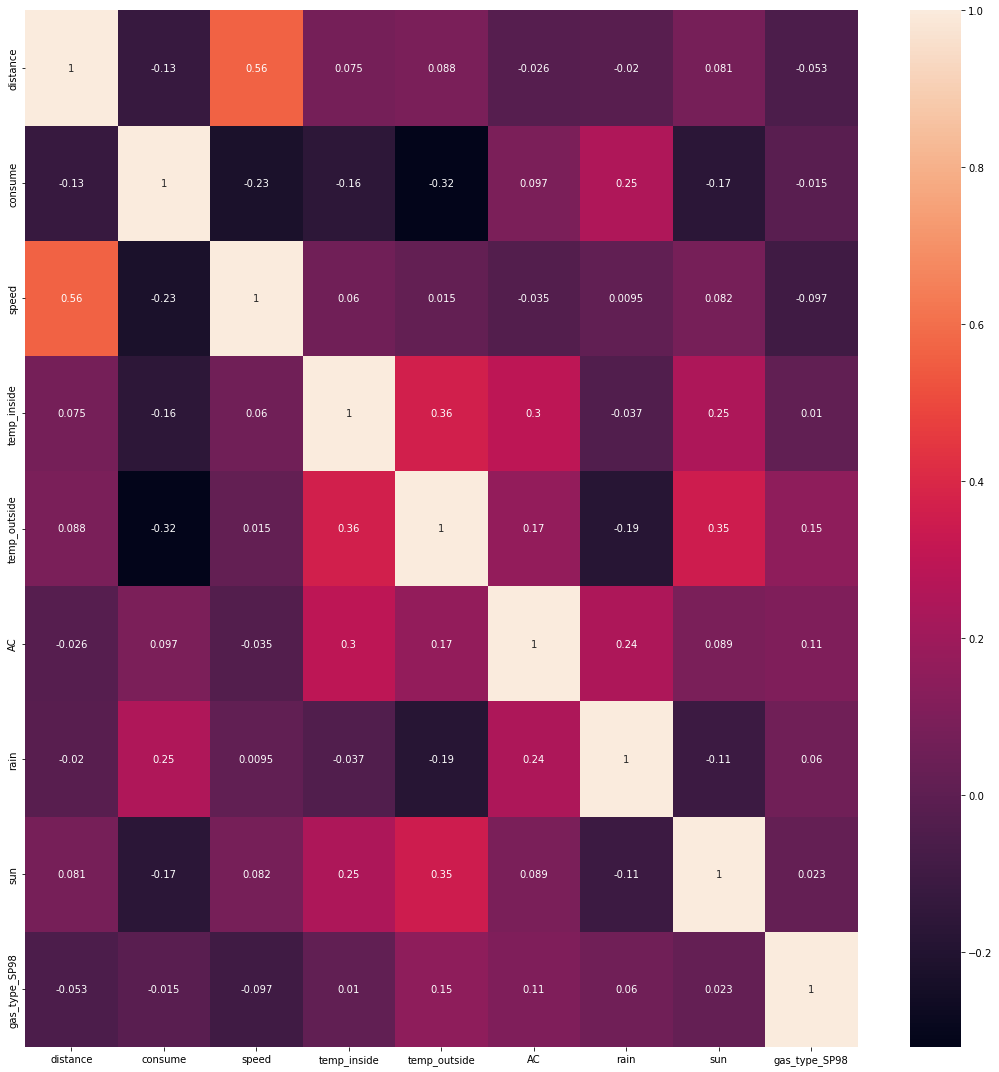

In [38]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, ax=ax)
plt.tight_layout()
plt.show()

##### There is no real correlation between the columns, except for the distance and speed columns, which reveal a slight correlation of 0.56